In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Covid Data.csv', parse_dates=['DATE_DIED'])

<ipython-input-2-5a3745d4ef7b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/drive/MyDrive/Covid Data.csv', parse_dates=['DATE_DIED'])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   PNEUMONIA             1032572 non-null  float64
 6   AGE                   1048575 non-null  int64  
 7   DIABETES              1045237 non-null  float64
 8   COPD                  1045572 non-null  float64
 9   ASTHMA                1045596 non-null  float64
 10  INMSUPR               1045171 non-null  float64
 11  HIPERTENSION          1045471 non-null  float64
 12  OTHER_DISEASE         1043530 non-null  float64
 13  CARDIOVASCULAR        1045499 non-null  float64
 14  OBESITY               1045543 non-

In [ ]:
df['USMER'].unique()

array([2, 1])

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df['death_status'] = df['DATE_DIED'] != '9999-99-99'
df['death_status'].value_counts()

False    971633
True      76942
Name: death_status, dtype: int64

In [ ]:
df['death_status'] = df['death_status'].astype(int)

In [ ]:
columns_to_replace = df.columns.difference(['AGE', 'PATIENT_TYPE', 'CLASSIFICATION', 'MEDICAL_UNIT', 'SEX', 'CLASSIFICATION_FINAL', 'USMER'])

# Normalizing data by removing missing data(97,98,99) and making all value True=1 False=0
# Use a loop to apply .replace() to the selected columns
for column in columns_to_replace:
    df[column] = df[column].replace(97, np.NaN)
    df[column] = df[column].replace(99, np.NaN)
    df[column] = df[column].replace(98, np.NaN)
    df[column] = df[column].replace(2, 0)

df['PATIENT_TYPE'] = df['PATIENT_TYPE'].replace(1, 0)
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].replace(2, 1)
df['SEX'] = df['SEX'].replace(1, 0)
df['SEX'] = df['SEX'].replace(2, 1)

[Text(0.5, 1.0, 'Missing data visualized')]

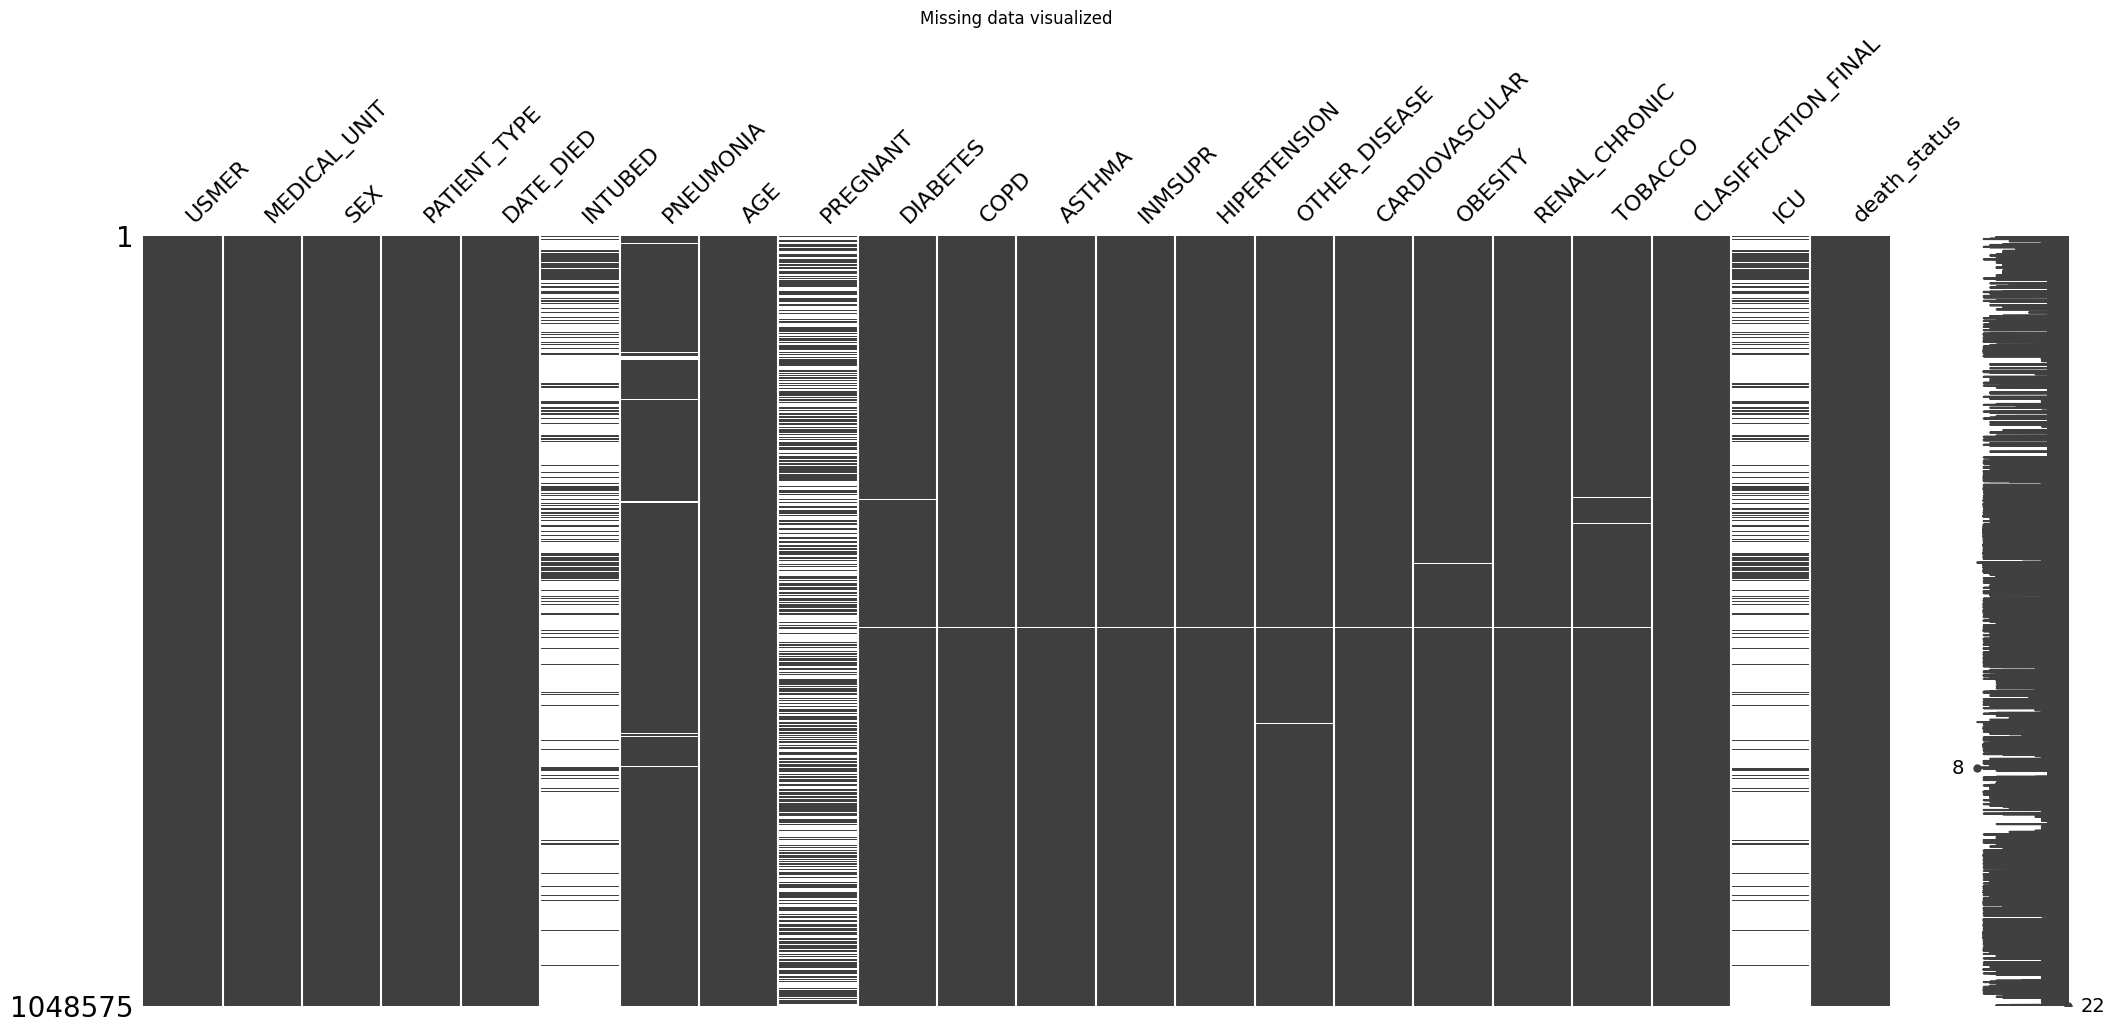

In [ ]:
import missingno as msgn
ax = msgn.matrix(df)
ax.set(title='Missing data visualized')

In [ ]:
# Droping columns with lot of missing data
df = df.drop(['INTUBED', 'PREGNANT', 'ICU'], axis=1)

In [17]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,death_status
0,2,1,0,0,03/05/2020,1.0,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,2,1,1,0,03/06/2020,1.0,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,1
2,2,1,1,1,09/06/2020,0.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,1,0,0,12/06/2020,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1
4,2,1,1,0,21/06/2020,0.0,68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1


In [18]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,death_status
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.032572e+06,1.048575e+06,1.045237e+06,1.045572e+06,1.045596e+06,1.045171e+06,1.045471e+06,1.043530e+06,1.045499e+06,1.045543e+06,1.045569e+06,1.045355e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,4.992595e-01,1.907646e-01,1.356206e-01,4.179410e+01,1.195796e-01,1.440551e-02,3.019522e-02,1.355759e-02,1.556514e-01,2.687033e-02,1.986516e-02,1.528545e-01,1.808011e-02,8.071516e-02,5.302122e+00,7.337768e-02
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.423854e-01,1.690739e+01,3.244694e-01,1.191554e-01,1.711242e-01,1.156451e-01,3.625247e-01,1.617045e-01,1.395369e-01,3.598474e-01,1.332413e-01,2.723973e-01,1.889226e+00,2.607556e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00
max,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00


<ipython-input-10-1dd670f62808>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


[Text(0.5, 1.0, 'Correlation between variables')]

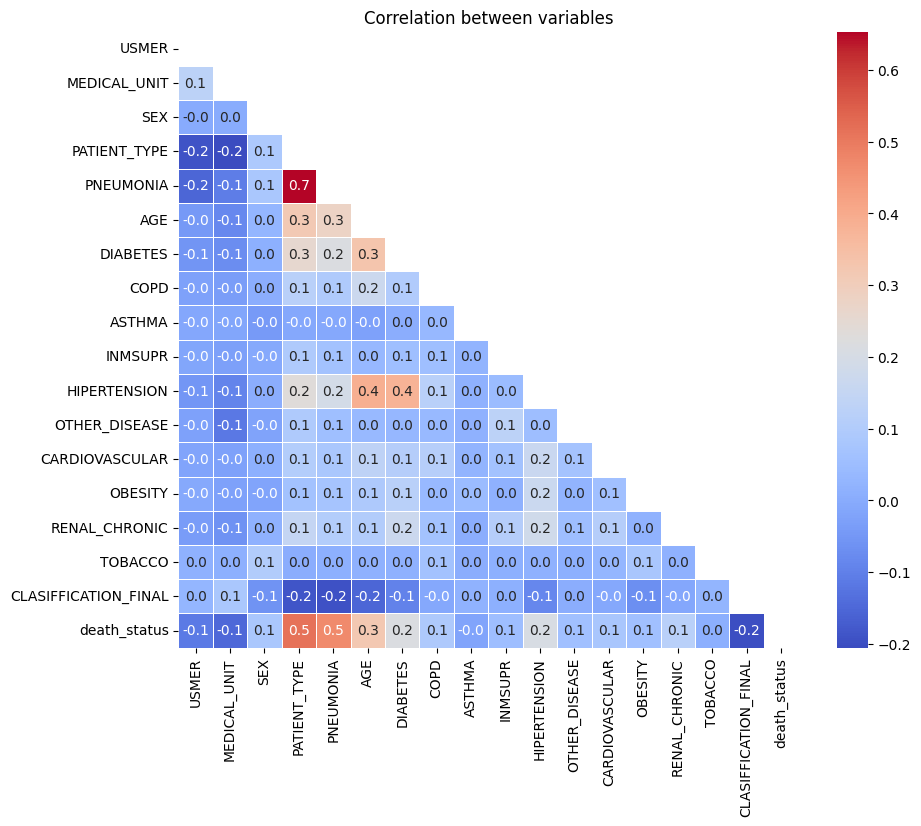

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Manually format the correlation values to two decimal places
annot_values = corr.applymap(lambda x: f'{x:.1f}').values

# Draw the heatmap with 'sns.heatmap()'
heatmap = sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=annot_values, fmt='', linewidths=0.5, ax=ax)
heatmap.set(title="Correlation between variables")

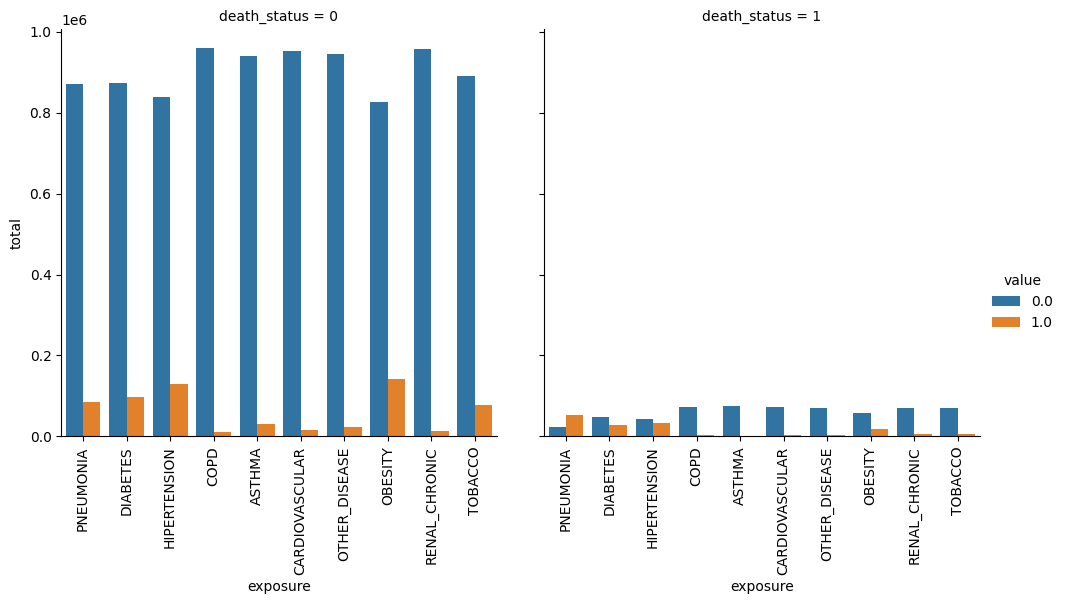

In [ ]:
df_cat = df.melt(id_vars=["death_status"], value_vars=["PNEUMONIA", "DIABETES", "HIPERTENSION", "COPD", "ASTHMA", "CARDIOVASCULAR", "OTHER_DISEASE", "OBESITY", "RENAL_CHRONIC", "TOBACCO"])


# Group and reformat the data to split it by 'death_status'. Show the counts of each feature.

ax = sns.catplot(data=df_cat, x="variable", hue="value", col="death_status", kind="count")
ax.set(xlabel = "exposure", ylabel="total")
ax.set_xticklabels(rotation=90)
plt.show()

In [ ]:
# Define the columns you want to analyze
columns_to_analyze = ["PNEUMONIA", "DIABETES", "HIPERTENSION", "COPD", "ASTHMA", "CARDIOVASCULAR", "OTHER_DISEASE", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]

print('relative risk of dx history for covid deaths')
# Loop through the selected columns
for coln in columns_to_analyze:
    exposed_cases = (df[(df['death_status'] == 1) & (df[coln] == 1)]).shape[0]
    exposed_total = (df[coln] == 1).sum()
    control_cases = (df[(df['death_status'] == 1) & (df[coln] == 0)]).shape[0]
    control_total = (df[coln] == 0).sum()
    relative_risk = stats.contingency.relative_risk(exposed_cases, exposed_total, control_cases, control_total).relative_risk

    # Print column name and relative risk
    print(f"Column: {coln}, Relative Risk: {relative_risk:.2f}")


relative risk of dx history for covid deaths
Column: PNEUMONIA, Relative Risk: 15.42
Column: DIABETES, Relative Risk: 4.34
Column: HIPERTENSION, Relative Risk: 3.94
Column: COPD, Relative Risk: 3.81
Column: ASTHMA, Relative Risk: 0.64
Column: CARDIOVASCULAR, Relative Risk: 3.05
Column: OTHER_DISEASE, Relative Risk: 2.31
Column: OBESITY, Relative Risk: 1.63
Column: RENAL_CHRONIC, Relative Risk: 4.39
Column: TOBACCO, Relative Risk: 1.08


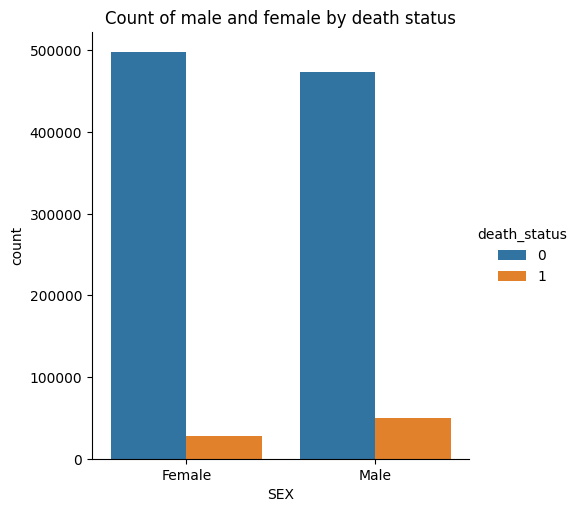

In [ ]:
ax = sns.catplot(data=df, kind='count', x='SEX', hue='death_status')
ax.set_xticklabels(['Female', 'Male'])
ax.set(title="Count of male and female by death status")
plt.show()

In [ ]:
exposed_cases = (df[(df['death_status'] == 1) & (df['SEX'] == 1)]).shape[0]
exposed_total = (df['SEX'] == 1).sum()
control_cases = (df[(df['death_status'] == 1) & (df['SEX'] == 0)]).shape[0]
control_total = (df['SEX'] == 0).sum()
relative_risk = stats.contingency.relative_risk(exposed_cases, exposed_total, control_cases, control_total).relative_risk
print(f"Relative risk for male gender: {relative_risk}")

Relative risk for male gender: 1.8132603768721267


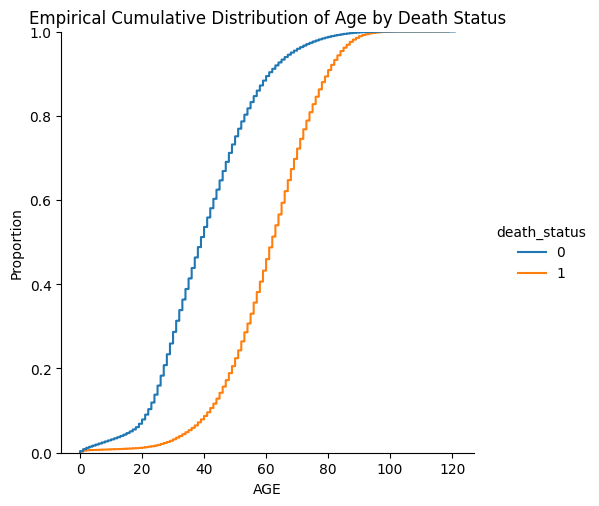

In [ ]:
ax = sns.displot(data=df, x='AGE', hue='death_status', kind='ecdf')
ax.set(title="Empirical Cumulative Distribution of Age by Death Status")